In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
sns.set()
sns.set_context("paper")
lw = 1
img_folder = 'out/images/'

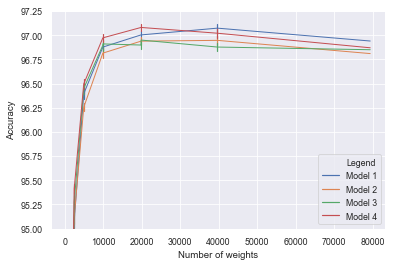

In [119]:
s = pd.read_pickle('./results/experiment1.pkl')
original = s.loc[s['pruning_method'] == 'original']
tmp = s.loc[s['pruning_perc'] == 50]
tmp = tmp.loc[tmp['pruning_method'] == 'magnitude_class_blinded']
# tmp = tmp.loc[tmp['accuracy'] > 95]
tmp = tmp.append(original, ignore_index=True)

plt.ylim(95, 97.25)
tmp.loc[tmp['model'] == 0, ['model']] = 'Model 1'
tmp.loc[tmp['model'] == 1, ['model']] = 'Model 2'
tmp.loc[tmp['model'] == 2, ['model']] = 'Model 3'
tmp.loc[tmp['model'] == 3, ['model']] = 'Model 4'
sns.lineplot(x='number_of_weights', y='accuracy', hue='model', err_style='bars', data=tmp, markers=True, ci='sd', legend='full', linewidth=lw)
plt.legend().texts[0].set_text('Legend')
plt.ylabel('Accuracy')
plt.xlabel('Number of weights')
plt.savefig(img_folder + 'comp-differentmodels-2.png', dpi=600)

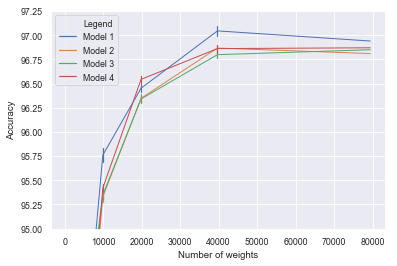

In [120]:
s = pd.read_pickle('./results/experiment1.pkl')
original = s.loc[s['pruning_method'] == 'original']
tmp = s.loc[s['pruning_perc'] == 50]
tmp = tmp.loc[tmp['pruning_method'] == 'magnitude_class_uniform']
# tmp = tmp.loc[tmp['accuracy'] > 95]
tmp = tmp.append(original, ignore_index=True)

plt.ylim(95, 97.25)
tmp.loc[tmp['model'] == 0, ['model']] = 'Model 1'
tmp.loc[tmp['model'] == 1, ['model']] = 'Model 2'
tmp.loc[tmp['model'] == 2, ['model']] = 'Model 3'
tmp.loc[tmp['model'] == 3, ['model']] = 'Model 4'
sns.lineplot(x='number_of_weights', y='accuracy', hue='model', err_style='bars', data=tmp, markers=True, ci='sd', legend='full', linewidth=lw)
plt.legend().texts[0].set_text('Legend')
plt.ylabel('Accuracy')
plt.xlabel('Number of weights')
plt.savefig(img_folder + 'comp-differentmodels.png', dpi=600)

## Comparison of pruning strategies

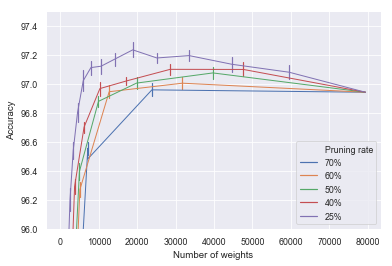

In [121]:
s = pd.read_pickle('./results/experiment1.pkl')
original = s.loc[s['pruning_method'] == 'original']
s = s.loc[s['pruning_method'] == 'magnitude_class_blinded']
original.loc[original['model'] == 0, ['model']] = 'Model 1'
# tmp = tmp.loc[tmp['accuracy'] > 95]

original['pruning_perc'] = 25
s = s.append(original, ignore_index=True)
original['pruning_perc'] = 40
s = s.append(original, ignore_index=True)
original['pruning_perc'] = 50
s = s.append(original, ignore_index=True)
original['pruning_perc'] = 60
s = s.append(original, ignore_index=True)
original['pruning_perc'] = 70
s = s.append(original, ignore_index=True)

s['pruning_perc'] = s['pruning_perc'].astype(float)
s = s.loc[s['model'] == 'Model 1']
s.loc[s['pruning_perc'] == 25.0, ['pruning_perc']] = '25%'
s.loc[s['pruning_perc'] == 40.0, ['pruning_perc']] = '40%'
s.loc[s['pruning_perc'] == 50.0, ['pruning_perc']] = '50%'
s.loc[s['pruning_perc'] == 60.0, ['pruning_perc']] = '60%'
s.loc[s['pruning_perc'] == 70.0, ['pruning_perc']] = '70%'

#s = s.loc[s['pruning_perc'] == 25]
#s = s.loc[s['run'] == 0]


sns.lineplot(x='number_of_weights', y='accuracy', hue='pruning_perc', err_style='bars', data=s, markers=True, ci='sd', legend='full', linewidth=lw)
plt.ylim(96, 97.5)
plt.legend().texts[0].set_text('Pruning rate')
plt.ylabel('Accuracy')
plt.xlabel('Number of weights')
plt.savefig(img_folder + 'comp-pruningperc.png', dpi=600)

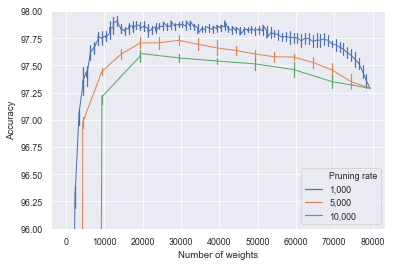

In [122]:
s = pd.read_pickle('./results/experiment3.pkl')
original = s.loc[s['pruning_method'] == 'original']
s = s.loc[s['pruning_method'] == 'magnitude_class_blinded_absolute']

original['pruning_perc'] = 1000
s = s.append(original, ignore_index=True)
original['pruning_perc'] = 5000
s = s.append(original, ignore_index=True)
original['pruning_perc'] = 10000
s = s.append(original, ignore_index=True)

s['pruning_perc'] = s['pruning_perc'].astype(float)
s.loc[s['pruning_perc'] == 1000.0, ['pruning_perc']] = '1,000'
s.loc[s['pruning_perc'] == 5000.0, ['pruning_perc']] = '5,000'
s.loc[s['pruning_perc'] == 10000.0, ['pruning_perc']] = '10,000'

sns.lineplot(x='number_of_weights', y='accuracy', hue='pruning_perc', err_style='bars', data=s, markers=True, ci='sd', legend='full', linewidth=lw)
plt.legend().texts[0].set_text('Pruning rate')
plt.ylabel('Accuracy')
plt.xlabel('Number of weights')
plt.ylim(96, 98)
plt.savefig(img_folder + 'comp-pruningrate.png', dpi=600)

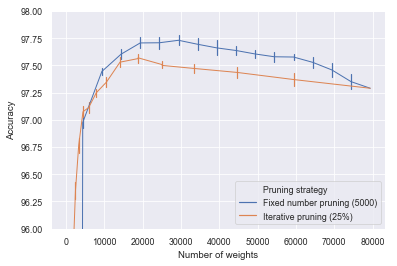

In [123]:
s = pd.read_pickle('./results/experiment3.pkl')
original = s.loc[s['pruning_method'] == 'original']
s = s.loc[s['pruning_method'] == 'magnitude_class_blinded_absolute']

original['pruning_perc'] = 1000
s = s.append(original, ignore_index=True)
original['pruning_perc'] = 5000
s = s.append(original, ignore_index=True)
original['pruning_perc'] = 10000
s = s.append(original, ignore_index=True)
s = s.loc[s['pruning_perc'] == 5000]
# s = s.loc[s['number_of_weights'] != 0]
s['Pruning strategy'] = 'Fixed number pruning (5000)'

s2 = pd.read_pickle('./results/experiment2.pkl')
original2 = s2.loc[s2['pruning_method'] == 'original']

s2 = s2.loc[s2['pruning_method'] == 'magnitude_class_blinded']
s2 = s2.loc[s2['variable'] == False]
s2 = s2.loc[s2['pruning_perc'] == 25]
# s2 = s2.loc[s2['number_of_weights'] != 0]
s2 = s2.append(original2, ignore_index=True)
s.loc[s['pruning_method'] == 'random_pruning', ['pruning_method']] = 'Random'
s2.loc[s2['number_of_weights'] == 44663.0, ['number_of_weights']] = 44662.0
s2.loc[s2['number_of_weights'] == 33497.0, ['number_of_weights']] = 33496.0
s2['Pruning strategy'] = 'Iterative pruning (25%)'

original2['pruning_perc'] = 25
s = s.append(s2, ignore_index=True)

sns.lineplot(x='number_of_weights', y='accuracy', hue='Pruning strategy', err_style='bars', data=s, markers=True, ci='sd', legend='full', linewidth=lw)
plt.ylim(96, 98)
plt.ylabel('Accuracy')
plt.xlabel('Number of weights')
plt.savefig(img_folder + 'comp-iterative-fixed.png', dpi=600)

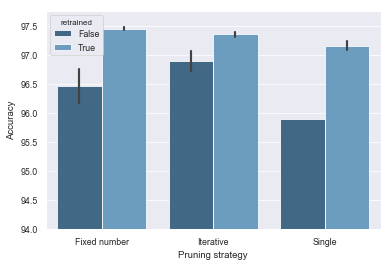

In [124]:
s = pd.read_pickle('./results/experiment4.pkl')
s = s.loc[s['pruning_perc'] == 85]
s = s.loc[s['pruning_method'] == 'magnitude_class_blinded']
s['strategy'] = 'Single'

t = pd.DataFrame(columns=['run', 'accuracy', 'pruning_perc', 'number_of_weights', 'pruning_method', 'time',
                        'retrain_change', 'retrain_epochs'])
t['accuracy'] = s['accuracy'] - s['retrain_change']
t['number_of_weights'] = s['number_of_weights']
t['accuracy'] = t['accuracy'].astype(float)
t['strategy'] = 'Single'
#t['run'] = s['run']
#t['variable'] = 2.0
#t['pruning_perc'] = 50
#t['retrain_change'] = 0
#t['retrain_epochs'] = 0
#t['time'] = 0

s2 = pd.read_pickle('./results/experiment3.pkl')
s2 = s2.loc[s2['pruning_perc'] == 5000]
s2 = s2.loc[s2['pruning_method'] == 'magnitude_class_blinded_absolute']
s2 = s2.loc[s2['number_of_weights'] == 9400]
s2['strategy'] = 'Fixed number'

t2 = pd.DataFrame(columns=['run', 'accuracy', 'pruning_perc', 'number_of_weights', 'pruning_method', 'time',
                        'retrain_change', 'retrain_epochs'])
t2['accuracy'] = s2['accuracy'] - s2['retrain_change']
t2['number_of_weights'] = s2['number_of_weights']
t2['accuracy'] = t2['accuracy'].astype(float)
t2['strategy'] = 'Fixed number'

s3 = pd.read_pickle('./results/experiment2.pkl')
s3 = s3.loc[s3['pruning_method'] == 'magnitude_class_blinded']
s3 = s3.loc[s3['number_of_weights'] == 10598]
s3 = s3.loc[s3['variable'] == False]
s3['strategy'] = 'Iterative'

t3 = pd.DataFrame(columns=['run', 'accuracy', 'pruning_perc', 'number_of_weights', 'pruning_method', 'time',
                        'retrain_change', 'retrain_epochs'])
t3['accuracy'] = s3['accuracy'] - s3['retrain_change']
t3['number_of_weights'] = s3['number_of_weights']
t3['accuracy'] = t3['accuracy'].astype(float)
t3['strategy'] = 'Iterative'

s = s.append(s2, ignore_index=True)
s = s.append(s3, ignore_index=True)

t = t.append(t2, ignore_index=True)
t = t.append(t3, ignore_index=True)
t['retrained'] = False
s['retrained'] = True

s['pruning_perc'] = s['pruning_perc'].astype(float)
t['pruning_perc'] = t['pruning_perc'].astype(float)

s = s.append(t, ignore_index=True)

sns.barplot(x='strategy', y='accuracy', hue='retrained', data=s, ci='sd', order=['Fixed number', 'Iterative', 'Single'], palette="Blues_d")
plt.ylim(94, 97.75)
plt.ylabel('Accuracy')
plt.xlabel('Pruning strategy')
plt.savefig(img_folder + 'comp-iterative-fixed-single.png', dpi=600)

## Analysis of effect of retraining on pruning

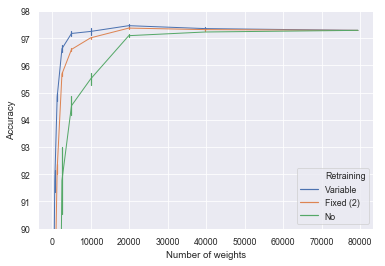

In [125]:
s = pd.read_pickle('./results/experiment2.pkl')
original = s.loc[s['pruning_method'] == 'original']
s = s.loc[s['pruning_method'] == 'magnitude_class_blinded']
# s = s.loc[s['accuracy'] > 90]
s = s.loc[s['pruning_perc'] == 50]

original['variable'] = True
s = s.append(original, ignore_index=True)
original['variable'] = False
s = s.append(original, ignore_index=True)

t = pd.DataFrame(columns=['run', 'accuracy', 'pruning_perc', 'number_of_weights', 'pruning_method', 'time',
                        'retrain_change', 'retrain_epochs'])

t['accuracy'] = s['accuracy'] - s['retrain_change']
t['number_of_weights'] = s['number_of_weights']
t['run'] = s['run']
t['variable'] = s['variable']
t['pruning_perc'] = 50
t['retrain_change'] = 0
t['retrain_epochs'] = 0
t['pruning_method'] = 'magnitude_class_blinded'
t['time'] = 0
t['accuracy'] = t['accuracy'].astype(float)
t = t.loc[t['variable'] == False]
t['variable'] = 'No'

s.loc[s['variable'] == True, ['variable']] = 'Variable'
s.loc[s['variable'] == False, ['variable']] = 'Fixed (2)'
s.loc[s['number_of_weights'] == 9926.0, ['number_of_weights']] = 9925.0

s = s.append(t, ignore_index=True)
plt.ylim(90, 98)
sns.lineplot(x='number_of_weights', y='accuracy', hue='variable', err_style='bars', data=s, markers=True, ci='sd', legend='full', linewidth=lw)
plt.legend().texts[0].set_text('Retraining')
plt.ylabel('Accuracy')
plt.xlabel('Number of weights')
plt.savefig(img_folder + 'comp-variableretraining-2.png', dpi=600)

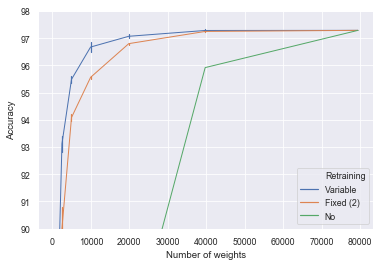

In [126]:
s = pd.read_pickle('./results/experiment2.pkl')
original = s.loc[s['pruning_method'] == 'original']
s = s.loc[s['pruning_method'] == 'magnitude_class_uniform']
# s = s.loc[s['accuracy'] > 90]
s = s.loc[s['pruning_perc'] == 50]

original['variable'] = True
s = s.append(original, ignore_index=True)
original['variable'] = False
s = s.append(original, ignore_index=True)

t = pd.DataFrame(columns=['run', 'accuracy', 'pruning_perc', 'number_of_weights', 'pruning_method', 'time',
                        'retrain_change', 'retrain_epochs'])

t['accuracy'] = s['accuracy'] - s['retrain_change']
t['number_of_weights'] = s['number_of_weights']
t['run'] = s['run']
t['variable'] = s['variable']
t['pruning_perc'] = 50
t['retrain_change'] = 0
t['retrain_epochs'] = 0
t['time'] = 0
t['accuracy'] = t['accuracy'].astype(float)
t = t.loc[t['variable'] == False]
t['variable'] = 'No'

s.loc[s['variable'] == True, ['variable']] = 'Variable'
s.loc[s['variable'] == False, ['variable']] = 'Fixed (2)'

s = s.append(t, ignore_index=True)
plt.ylim(90, 98)
sns.lineplot(x='number_of_weights', y='accuracy', hue='variable', err_style='bars', data=s, markers=True, ci='sd', legend='full', linewidth=lw)
plt.legend().texts[0].set_text('Retraining')
plt.ylabel('Accuracy')
plt.xlabel('Number of weights')
plt.savefig(img_folder + 'comp-variableretraining.png', dpi=600)

## Comparison of different pruning methods

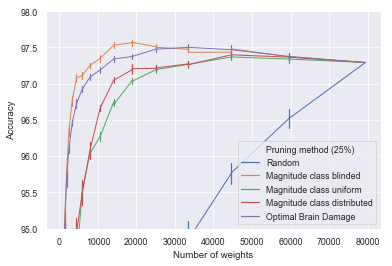

In [127]:
s = pd.read_pickle('./results/experiment2.pkl')

original = s.loc[s['pruning_method'] == 'original']
s = s.loc[s['pruning_perc'] == 25]
s = s.loc[s['variable'] == False]

original['pruning_method'] = 'random_pruning'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'magnitude_class_blinded'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'magnitude_class_uniform'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'magnitude_class_distributed'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'optimal_brain_damage'
s = s.append(original, ignore_index=True)

s.loc[s['pruning_method'] == 'random_pruning', ['pruning_method']] = 'Random'
s.loc[s['pruning_method'] == 'magnitude_class_blinded', ['pruning_method']] = 'Magnitude class blinded'
s.loc[s['pruning_method'] == 'magnitude_class_uniform', ['pruning_method']] = 'Magnitude class uniform'
s.loc[s['pruning_method'] == 'magnitude_class_distributed', ['pruning_method']] = 'Magnitude class distributed'
s.loc[s['pruning_method'] == 'optimal_brain_damage', ['pruning_method']] = 'Optimal Brain Damage'

sns.lineplot(x='number_of_weights', y='accuracy', hue='pruning_method', hue_order=['Random', 'Magnitude class blinded', 'Magnitude class uniform', 'Magnitude class distributed', 'Optimal Brain Damage'], err_style='bars', data=s, markers=True, ci='sd', legend='full', linewidth=lw)
plt.legend().texts[0].set_text('Pruning method (25%)')
plt.ylim(95, 98)
plt.ylabel('Accuracy')
plt.xlabel('Number of weights')
plt.savefig(img_folder + 'comp-pruningmethod-iterative.png', dpi=600)

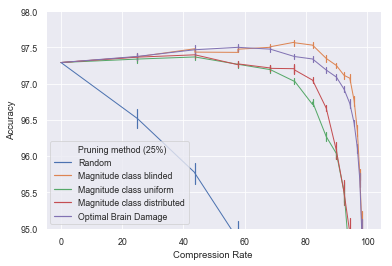

In [128]:
s = pd.read_pickle('./results/experiment2.pkl')

original = s.loc[s['pruning_method'] == 'original']
s = s.loc[s['pruning_perc'] == 25]
s = s.loc[s['variable'] == False]

original['pruning_method'] = 'random_pruning'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'magnitude_class_blinded'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'magnitude_class_uniform'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'magnitude_class_distributed'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'optimal_brain_damage'
s = s.append(original, ignore_index=True)

s.loc[s['pruning_method'] == 'random_pruning', ['pruning_method']] = 'Random'
s.loc[s['pruning_method'] == 'magnitude_class_blinded', ['pruning_method']] = 'Magnitude class blinded'
s.loc[s['pruning_method'] == 'magnitude_class_uniform', ['pruning_method']] = 'Magnitude class uniform'
s.loc[s['pruning_method'] == 'magnitude_class_distributed', ['pruning_method']] = 'Magnitude class distributed'
s.loc[s['pruning_method'] == 'optimal_brain_damage', ['pruning_method']] = 'Optimal Brain Damage'

s['compression_rate'] = (1 - (s['number_of_weights'] / 79400)) * 100

sns.lineplot(x='compression_rate', y='accuracy', hue='pruning_method', hue_order=['Random', 'Magnitude class blinded', 'Magnitude class uniform', 'Magnitude class distributed', 'Optimal Brain Damage'], err_style='bars', data=s, markers=True, ci='sd', legend='full', linewidth=lw)
plt.legend().texts[0].set_text('Pruning method (25%)')
plt.ylim(95, 98)
plt.ylabel('Accuracy')
plt.xlabel('Compression Rate')
plt.savefig(img_folder + 'comp-magnitude-san.png', dpi=600)

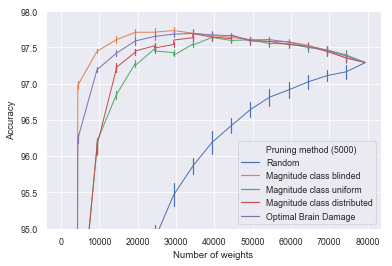

In [129]:
s = pd.read_pickle('./results/experiment3.pkl')

original = s.loc[s['pruning_method'] == 'original']
s = s.loc[s['pruning_perc'] == 5000]

original['pruning_method'] = 'random_pruning_absolute'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'magnitude_class_blinded_absolute'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'magnitude_class_uniform_absolute'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'magnitude_class_distributed_absolute'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'optimal_brain_damage_absolute'
s = s.append(original, ignore_index=True)

s.loc[s['pruning_method'] == 'random_pruning_absolute', ['pruning_method']] = 'Random'
s.loc[s['pruning_method'] == 'magnitude_class_blinded_absolute', ['pruning_method']] = 'Magnitude class blinded'
s.loc[s['pruning_method'] == 'magnitude_class_uniform_absolute', ['pruning_method']] = 'Magnitude class uniform'
s.loc[s['pruning_method'] == 'magnitude_class_distributed_absolute', ['pruning_method']] = 'Magnitude class distributed'
s.loc[s['pruning_method'] == 'optimal_brain_damage_absolute', ['pruning_method']] = 'Optimal Brain Damage'

sns.lineplot(x='number_of_weights', y='accuracy', hue='pruning_method', hue_order=['Random', 'Magnitude class blinded', 'Magnitude class uniform', 'Magnitude class distributed', 'Optimal Brain Damage'], err_style='bars', data=s, markers=True, ci='sd', legend='full', linewidth=lw)
plt.legend().texts[0].set_text('Pruning method (5000)')
plt.ylim(95, 98)
plt.ylabel('Accuracy')
plt.xlabel('Number of weights')
plt.savefig(img_folder + 'comp-pruningmethod-fixed.png', dpi=600)

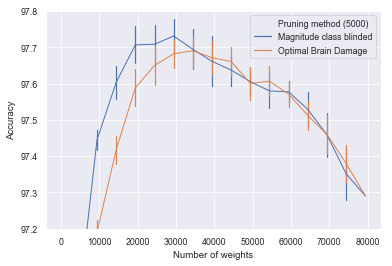

In [130]:
s = pd.read_pickle('./results/experiment3.pkl')

original = s.loc[s['pruning_method'] == 'original']
s = s.loc[s['pruning_perc'] == 5000]

original['pruning_method'] = 'random_pruning_absolute'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'magnitude_class_blinded_absolute'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'magnitude_class_uniform_absolute'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'magnitude_class_distributed_absolute'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'optimal_brain_damage_absolute'
s = s.append(original, ignore_index=True)

s.loc[s['pruning_method'] == 'random_pruning_absolute', ['pruning_method']] = 'Random'
s.loc[s['pruning_method'] == 'magnitude_class_blinded_absolute', ['pruning_method']] = 'Magnitude class blinded'
s.loc[s['pruning_method'] == 'magnitude_class_uniform_absolute', ['pruning_method']] = 'Magnitude class uniform'
s.loc[s['pruning_method'] == 'magnitude_class_distributed_absolute', ['pruning_method']] = 'Magnitude class distributed'
s.loc[s['pruning_method'] == 'optimal_brain_damage_absolute', ['pruning_method']] = 'Optimal Brain Damage'

s = s.loc[s['pruning_method'] != 'Random']
s = s.loc[s['pruning_method'] != 'Magnitude class uniform']
s = s.loc[s['pruning_method'] != 'Magnitude class distributed']

sns.lineplot(x='number_of_weights', y='accuracy', hue='pruning_method', err_style='bars', data=s, markers=True, ci='sd', legend='full', linewidth=lw)
plt.legend().texts[0].set_text('Pruning method (5000)')
plt.ylim(97.2, 97.8)
plt.ylabel('Accuracy')
plt.xlabel('Number of weights')
plt.savefig(img_folder + 'comp-pruningmethod-obdmag.png', dpi=600)

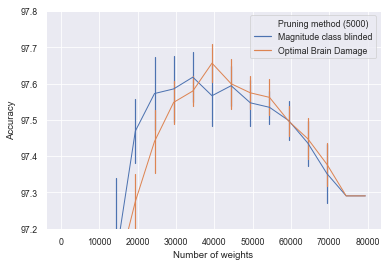

In [131]:
s = pd.read_pickle('./results/experiment3.pkl')

original = s.loc[s['pruning_method'] == 'original']
s = s.loc[s['pruning_perc'] == 5000]

original['pruning_method'] = 'random_pruning_absolute'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'magnitude_class_blinded_absolute'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'magnitude_class_uniform_absolute'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'magnitude_class_distributed_absolute'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'optimal_brain_damage_absolute'
s = s.append(original, ignore_index=True)

s.loc[s['pruning_method'] == 'random_pruning_absolute', ['pruning_method']] = 'Random'
s.loc[s['pruning_method'] == 'magnitude_class_blinded_absolute', ['pruning_method']] = 'Magnitude class blinded'
s.loc[s['pruning_method'] == 'magnitude_class_uniform_absolute', ['pruning_method']] = 'Magnitude class uniform'
s.loc[s['pruning_method'] == 'magnitude_class_distributed_absolute', ['pruning_method']] = 'Magnitude class distributed'
s.loc[s['pruning_method'] == 'optimal_brain_damage_absolute', ['pruning_method']] = 'Optimal Brain Damage'

s = s.loc[s['pruning_method'] != 'Random']
s = s.loc[s['pruning_method'] != 'Magnitude class uniform']
s = s.loc[s['pruning_method'] != 'Magnitude class distributed']

s['new_acc'] = s['accuracy'] - s['retrain_change']
s['new_acc'] = s['new_acc'].astype(float)

sns.lineplot(x='number_of_weights', y='new_acc', hue='pruning_method', err_style='bars', data=s, markers=True, ci='sd', legend='full', linewidth=lw)
plt.legend().texts[0].set_text('Pruning method (5000)')
plt.ylim(97.2, 97.8)
plt.ylabel('Accuracy')
plt.xlabel('Number of weights')
plt.savefig(img_folder + 'comp-pruningmethod-obdmag-noretrain.png', dpi=600)

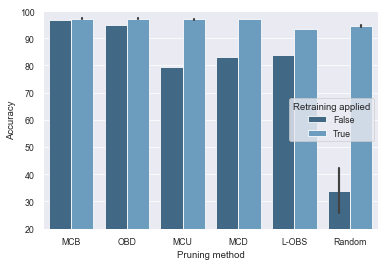

In [132]:
s = pd.read_pickle('./results/experiment4.pkl')
s = s.loc[s['pruning_perc'] == 80]
s = s.loc[s['retrain_epochs'] != 0]
s.loc[s['pruning_method'] == 'random_pruning', ['pruning_method']] = 'Random'
s.loc[s['pruning_method'] == 'magnitude_class_blinded', ['pruning_method']] = 'MCB'
s.loc[s['pruning_method'] == 'magnitude_class_uniform', ['pruning_method']] = 'MCU'
s.loc[s['pruning_method'] == 'magnitude_class_distributed', ['pruning_method']] = 'MCD'
s.loc[s['pruning_method'] == 'optimal_brain_damage', ['pruning_method']] = 'OBD'
s.loc[s['pruning_method'] == 'optimal_brain_surgeon_layer_wise', ['pruning_method']] = 'L-OBS'
s['retrained'] = True

t = pd.read_pickle('./results/experiment4.pkl')
t = t.loc[t['pruning_perc'] == 80]
s = s.loc[s['retrain_epochs'] != 0]
t.loc[t['pruning_method'] == 'random_pruning', ['pruning_method']] = 'Random'
t.loc[t['pruning_method'] == 'magnitude_class_blinded', ['pruning_method']] = 'MCB'
t.loc[t['pruning_method'] == 'magnitude_class_uniform', ['pruning_method']] = 'MCU'
t.loc[t['pruning_method'] == 'magnitude_class_distributed', ['pruning_method']] = 'MCD'
t.loc[t['pruning_method'] == 'optimal_brain_damage', ['pruning_method']] = 'OBD'
t.loc[t['pruning_method'] == 'optimal_brain_surgeon_layer_wise', ['pruning_method']] = 'L-OBS'
t['retrained'] = False
t['accuracy'] = t['accuracy'] - t['retrain_change']
t['accuracy'] = t['accuracy'].astype(float)

s = s.append(t, ignore_index=True)

sns.barplot(x="pruning_method", y="accuracy", data=s, hue='retrained', ci='sd', palette="Blues_d", order=['MCB', 'OBD', 'MCU', 'MCD', 'L-OBS', 'Random'])
plt.ylabel('Accuracy')
plt.xlabel('Pruning method')
plt.legend().set_title('Retraining applied')
plt.ylim(20, 100)
plt.savefig(img_folder + 'comp-pruningmeth-single.png', dpi=600)

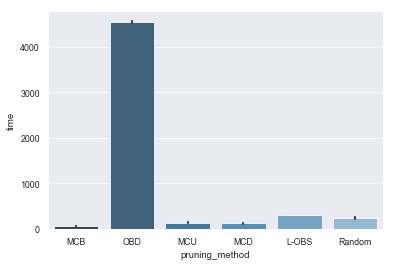

In [133]:
s = pd.read_pickle('./results/experiment4.pkl')
s = s.loc[s['pruning_perc'] == 80]
s = s.loc[s['retrain_epochs'] != 0]
s.loc[s['pruning_method'] == 'random_pruning', ['pruning_method']] = 'Random'
s.loc[s['pruning_method'] == 'magnitude_class_blinded', ['pruning_method']] = 'MCB'
s.loc[s['pruning_method'] == 'magnitude_class_uniform', ['pruning_method']] = 'MCU'
s.loc[s['pruning_method'] == 'magnitude_class_distributed', ['pruning_method']] = 'MCD'
s.loc[s['pruning_method'] == 'optimal_brain_damage', ['pruning_method']] = 'OBD'
s.loc[s['pruning_method'] == 'optimal_brain_surgeon_layer_wise', ['pruning_method']] = 'L-OBS'

sns.barplot(x="pruning_method", y="time", data=s, ci=95, palette="Blues_d", order=['MCB', 'OBD', 'MCU', 'MCD', 'L-OBS', 'Random'])
# plt.ylim(20, 100)

The last shown graph is not used in the thesis but only for a slight insight since the results are not meaningfull. The time the algorithm needs is highly depending on the implementation. Since OBD is impemented very inefficiently it seems that it takes way more time but the main reason for this might be the bad implementation.

## Baseline experiments

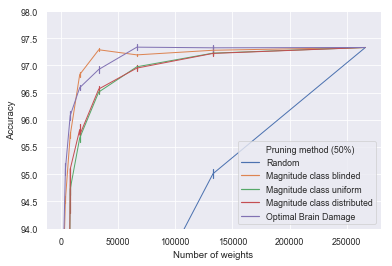

In [134]:
s = pd.read_pickle('./results/experiment5.pkl')
original = s.loc[s['pruning_method'] == 'original']
s = s.loc[s['pruning_perc'] == 50]

original['pruning_method'] = 'random_pruning'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'magnitude_class_blinded'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'magnitude_class_distributed'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'magnitude_class_uniform'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'optimal_brain_damage'
s = s.append(original, ignore_index=True)

s.loc[s['pruning_method'] == 'random_pruning', ['pruning_method']] = 'Random'
s.loc[s['pruning_method'] == 'magnitude_class_blinded', ['pruning_method']] = 'Magnitude class blinded'
s.loc[s['pruning_method'] == 'magnitude_class_uniform', ['pruning_method']] = 'Magnitude class uniform'
s.loc[s['pruning_method'] == 'magnitude_class_distributed', ['pruning_method']] = 'Magnitude class distributed'
s.loc[s['pruning_method'] == 'optimal_brain_damage', ['pruning_method']] = 'Optimal Brain Damage'

s = s.loc[s['run'] < 10]

sns.lineplot(x='number_of_weights', y='accuracy', hue='pruning_method', hue_order=['Random', 'Magnitude class blinded', 'Magnitude class uniform', 'Magnitude class distributed', 'Optimal Brain Damage'], err_style='bars', data=s, markers=True, ci='sd', legend='full', linewidth=lw)
plt.ylim(94, 98)
plt.ylabel('Accuracy')
plt.xlabel('Number of weights')
plt.legend().texts[0].set_text('Pruning method (50%)')
plt.savefig(img_folder + 'comp-baseline-differentmodel-1.png', dpi=600)

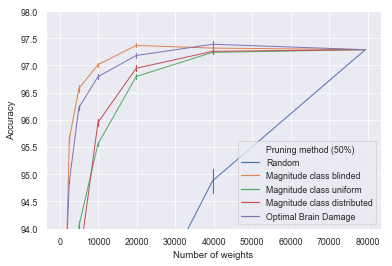

In [135]:
s = pd.read_pickle('./results/experiment2.pkl')
original = s.loc[s['pruning_method'] == 'original']
s = s.loc[s['pruning_perc'] == 50]
s = s.loc[s['variable'] == False]

original['pruning_method'] = 'random_pruning'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'magnitude_class_blinded'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'magnitude_class_distributed'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'magnitude_class_uniform'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'optimal_brain_damage'
s = s.append(original, ignore_index=True)

s = s.loc[s['run'] < 10]

s.loc[s['pruning_method'] == 'random_pruning', ['pruning_method']] = 'Random'
s.loc[s['pruning_method'] == 'magnitude_class_blinded', ['pruning_method']] = 'Magnitude class blinded'
s.loc[s['pruning_method'] == 'magnitude_class_uniform', ['pruning_method']] = 'Magnitude class uniform'
s.loc[s['pruning_method'] == 'magnitude_class_distributed', ['pruning_method']] = 'Magnitude class distributed'
s.loc[s['pruning_method'] == 'optimal_brain_damage', ['pruning_method']] = 'Optimal Brain Damage'

sns.lineplot(x='number_of_weights', y='accuracy', hue='pruning_method', hue_order=['Random', 'Magnitude class blinded', 'Magnitude class uniform', 'Magnitude class distributed', 'Optimal Brain Damage'], err_style='bars', data=s, markers=True, ci='sd', legend='full', linewidth=lw)
plt.ylim(94, 98)
plt.ylabel('Accuracy')
plt.xlabel('Number of weights')
plt.legend().texts[0].set_text('Pruning method (50%)')
plt.savefig(img_folder + 'comp-baseline-differentmodel-2.png', dpi=600)

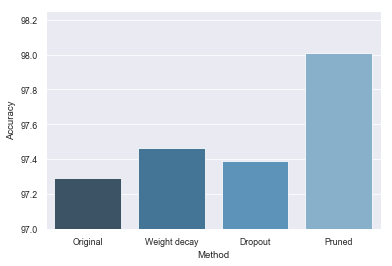

In [136]:
s = pd.read_pickle('./results/experiment3.pkl')

original = s.loc[s['pruning_method'] == 'original']
s = s.loc[s['pruning_perc'] == 1000]
s = s.loc[s['number_of_weights'] == 13400]
s = s.loc[s['pruning_method'] == 'magnitude_class_blinded_absolute']
s = s.loc[s['run'] == 10]
s['Method'] = 'Pruned'

original['Method'] = 'Original'
t = original
t = t.append(s, ignore_index=True)

w = pd.read_pickle('./results/weight-decay.pkl')
w = w.sort_values(by=['accuracy'], ascending=False).reset_index(drop=True)
w['Method'] = 'Weight decay'
t = t.append(w.loc[0], ignore_index=True)

d = pd.read_pickle('./results/dropout.pkl')
d = d.append(pd.read_pickle('./results/dropout_1.pkl'), ignore_index=True)
d = d.sort_values(by=['accuracy'], ascending=False).reset_index(drop=True)
d['Method'] = 'Dropout'
t = t.append(d.loc[0], ignore_index=True)

sns.barplot(x="Method", y="accuracy", data=t, palette="Blues_d", order=['Original', 'Weight decay', 'Dropout', 'Pruned'])
plt.ylabel('Accuracy')
plt.ylim(97, 98.25)
plt.savefig(img_folder + 'comp-baseline-reg.png', dpi=600)

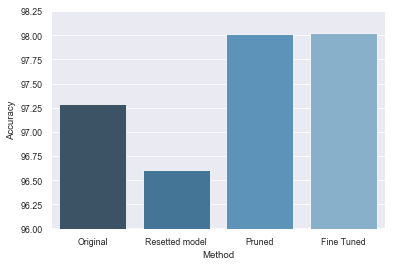

In [137]:
s = pd.read_pickle('./results/experiment3.pkl')

original = s.loc[s['pruning_method'] == 'original']
s = s.loc[s['pruning_perc'] == 1000]
s = s.loc[s['number_of_weights'] == 13400]
s = s.loc[s['pruning_method'] == 'magnitude_class_blinded_absolute']
s = s.loc[s['run'] == 10]
s['Method'] = 'Pruned'

original['Method'] = 'Original'
s = s.append(original, ignore_index=True)

s_t = pd.read_pickle('./results/model-f-scratch.pkl')
s_t['accuracy'] = s_t['test_acc']
s_t = s_t.sort_values(by=['accuracy'], ascending=False).reset_index(drop=True)
s_t['Method'] = 'Resetted model'
s_t = s_t.loc[0]
s_t['accuracy'] = s_t['accuracy'][0]
s = s.append(s_t, ignore_index=True)

f = pd.read_pickle('./results/model-f-finetuned.pkl')
f['accuracy'] = f['test_acc']
f = f.sort_values(by=['accuracy'], ascending=False).reset_index(drop=True)
f['Method'] = 'Fine Tuned'
f = f.loc[0]
f['accuracy'] = f['accuracy'][0]
s = s.append(f, ignore_index=True)

sns.barplot(x="Method", y="accuracy", data=s, palette="Blues_d", order=['Original', 'Resetted model', 'Pruned', 'Fine Tuned'])
plt.ylabel('Accuracy')
plt.ylim(96, 98.25)
plt.savefig(img_folder + 'comp-baseline-retr.png', dpi=600)

# Graphs for the presentation

In [6]:
sns.set()
sns.set_context("talk")

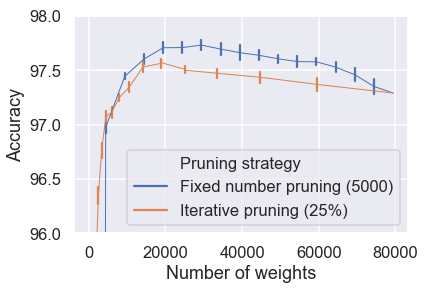

In [14]:
s = pd.read_pickle('./results/experiment3.pkl')
original = s.loc[s['pruning_method'] == 'original']
s = s.loc[s['pruning_method'] == 'magnitude_class_blinded_absolute']

original['pruning_perc'] = 1000
s = s.append(original, ignore_index=True)
original['pruning_perc'] = 5000
s = s.append(original, ignore_index=True)
original['pruning_perc'] = 10000
s = s.append(original, ignore_index=True)
s = s.loc[s['pruning_perc'] == 5000]
# s = s.loc[s['number_of_weights'] != 0]
s['Pruning strategy'] = 'Fixed number pruning (5000)'

s2 = pd.read_pickle('./results/experiment2.pkl')
original2 = s2.loc[s2['pruning_method'] == 'original']

s2 = s2.loc[s2['pruning_method'] == 'magnitude_class_blinded']
s2 = s2.loc[s2['variable'] == False]
s2 = s2.loc[s2['pruning_perc'] == 25]
# s2 = s2.loc[s2['number_of_weights'] != 0]
s2 = s2.append(original2, ignore_index=True)
s.loc[s['pruning_method'] == 'random_pruning', ['pruning_method']] = 'Random'
s2.loc[s2['number_of_weights'] == 44663.0, ['number_of_weights']] = 44662.0
s2.loc[s2['number_of_weights'] == 33497.0, ['number_of_weights']] = 33496.0
s2['Pruning strategy'] = 'Iterative pruning (25%)'

original2['pruning_perc'] = 25
s = s.append(s2, ignore_index=True)

sns.lineplot(x='number_of_weights', y='accuracy', hue='Pruning strategy', err_style='bars', data=s, markers=True, ci='sd', legend='full', linewidth=lw)
plt.ylim(96, 98)
plt.ylabel('Accuracy')
plt.xlabel('Number of weights')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(img_folder + 'pres-iterative-fixed.png', dpi=600)

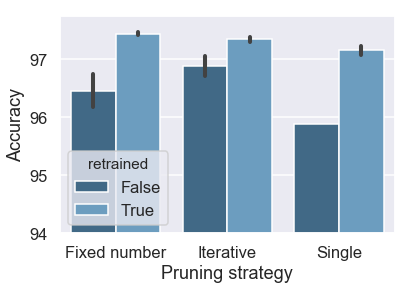

In [15]:
s = pd.read_pickle('./results/experiment4.pkl')
s = s.loc[s['pruning_perc'] == 85]
s = s.loc[s['pruning_method'] == 'magnitude_class_blinded']
s['strategy'] = 'Single'

t = pd.DataFrame(columns=['run', 'accuracy', 'pruning_perc', 'number_of_weights', 'pruning_method', 'time',
                        'retrain_change', 'retrain_epochs'])
t['accuracy'] = s['accuracy'] - s['retrain_change']
t['number_of_weights'] = s['number_of_weights']
t['accuracy'] = t['accuracy'].astype(float)
t['strategy'] = 'Single'
#t['run'] = s['run']
#t['variable'] = 2.0
#t['pruning_perc'] = 50
#t['retrain_change'] = 0
#t['retrain_epochs'] = 0
#t['time'] = 0

s2 = pd.read_pickle('./results/experiment3.pkl')
s2 = s2.loc[s2['pruning_perc'] == 5000]
s2 = s2.loc[s2['pruning_method'] == 'magnitude_class_blinded_absolute']
s2 = s2.loc[s2['number_of_weights'] == 9400]
s2['strategy'] = 'Fixed number'

t2 = pd.DataFrame(columns=['run', 'accuracy', 'pruning_perc', 'number_of_weights', 'pruning_method', 'time',
                        'retrain_change', 'retrain_epochs'])
t2['accuracy'] = s2['accuracy'] - s2['retrain_change']
t2['number_of_weights'] = s2['number_of_weights']
t2['accuracy'] = t2['accuracy'].astype(float)
t2['strategy'] = 'Fixed number'

s3 = pd.read_pickle('./results/experiment2.pkl')
s3 = s3.loc[s3['pruning_method'] == 'magnitude_class_blinded']
s3 = s3.loc[s3['number_of_weights'] == 10598]
s3 = s3.loc[s3['variable'] == False]
s3['strategy'] = 'Iterative'

t3 = pd.DataFrame(columns=['run', 'accuracy', 'pruning_perc', 'number_of_weights', 'pruning_method', 'time',
                        'retrain_change', 'retrain_epochs'])
t3['accuracy'] = s3['accuracy'] - s3['retrain_change']
t3['number_of_weights'] = s3['number_of_weights']
t3['accuracy'] = t3['accuracy'].astype(float)
t3['strategy'] = 'Iterative'

s = s.append(s2, ignore_index=True)
s = s.append(s3, ignore_index=True)

t = t.append(t2, ignore_index=True)
t = t.append(t3, ignore_index=True)
t['retrained'] = False
s['retrained'] = True

s['pruning_perc'] = s['pruning_perc'].astype(float)
t['pruning_perc'] = t['pruning_perc'].astype(float)

s = s.append(t, ignore_index=True)

sns.barplot(x='strategy', y='accuracy', hue='retrained', data=s, ci='sd', order=['Fixed number', 'Iterative', 'Single'], palette="Blues_d")
plt.ylim(94, 97.75)
plt.ylabel('Accuracy')
plt.xlabel('Pruning strategy')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(img_folder + 'pres-iterative-fixed-single.png', dpi=600)

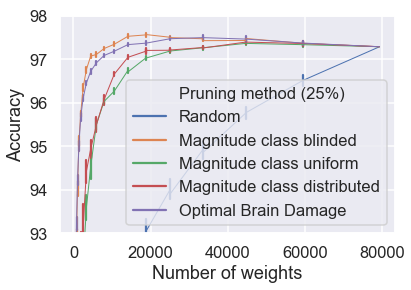

In [19]:
s = pd.read_pickle('./results/experiment2.pkl')

original = s.loc[s['pruning_method'] == 'original']
s = s.loc[s['pruning_perc'] == 25]
s = s.loc[s['variable'] == False]

original['pruning_method'] = 'random_pruning'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'magnitude_class_blinded'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'magnitude_class_uniform'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'magnitude_class_distributed'
s = s.append(original, ignore_index=True)
original['pruning_method'] = 'optimal_brain_damage'
s = s.append(original, ignore_index=True)

s.loc[s['pruning_method'] == 'random_pruning', ['pruning_method']] = 'Random'
s.loc[s['pruning_method'] == 'magnitude_class_blinded', ['pruning_method']] = 'Magnitude class blinded'
s.loc[s['pruning_method'] == 'magnitude_class_uniform', ['pruning_method']] = 'Magnitude class uniform'
s.loc[s['pruning_method'] == 'magnitude_class_distributed', ['pruning_method']] = 'Magnitude class distributed'
s.loc[s['pruning_method'] == 'optimal_brain_damage', ['pruning_method']] = 'Optimal Brain Damage'

sns.lineplot(x='number_of_weights', y='accuracy', hue='pruning_method', hue_order=['Random', 'Magnitude class blinded', 'Magnitude class uniform', 'Magnitude class distributed', 'Optimal Brain Damage'], err_style='bars', data=s, markers=True, ci='sd', legend='full', linewidth=lw)
plt.legend().texts[0].set_text('Pruning method (25%)')
plt.ylim(93, 98)
plt.ylabel('Accuracy')
plt.xlabel('Number of weights')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(img_folder + 'pres-pruningmethod-iterative.png', dpi=600)

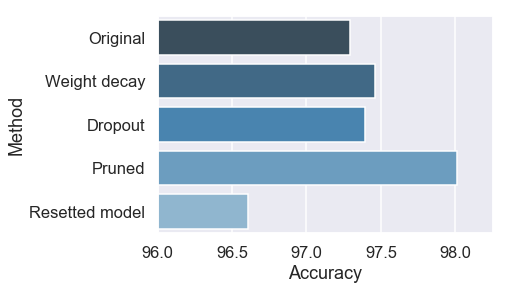

In [7]:
s = pd.read_pickle('./results/experiment3.pkl')

original = s.loc[s['pruning_method'] == 'original']
s = s.loc[s['pruning_perc'] == 1000]
s = s.loc[s['number_of_weights'] == 13400]
s = s.loc[s['pruning_method'] == 'magnitude_class_blinded_absolute']
s = s.loc[s['run'] == 10]
s['Method'] = 'Pruned'

original['Method'] = 'Original'
t = original
t = t.append(s, ignore_index=True)

w = pd.read_pickle('./results/weight-decay.pkl')
w = w.sort_values(by=['accuracy'], ascending=False).reset_index(drop=True)
w['Method'] = 'Weight decay'
t = t.append(w.loc[0], ignore_index=True)

d = pd.read_pickle('./results/dropout.pkl')
d = d.append(pd.read_pickle('./results/dropout_1.pkl'), ignore_index=True)
d = d.sort_values(by=['accuracy'], ascending=False).reset_index(drop=True)
d['Method'] = 'Dropout'
t = t.append(d.loc[0], ignore_index=True)

s_t = pd.read_pickle('./results/model-f-scratch.pkl')
s_t['accuracy'] = s_t['test_acc']
s_t = s_t.sort_values(by=['accuracy'], ascending=False).reset_index(drop=True)
s_t['Method'] = 'Resetted model'
s_t = s_t.loc[0]
s_t['accuracy'] = s_t['accuracy'][0]
t = t.append(s_t, ignore_index=True)

sns.barplot(x="accuracy", y="Method", data=t, palette="Blues_d", order=['Original', 'Weight decay', 'Dropout', 'Pruned', 'Resetted model'])
plt.xlabel('Accuracy')
plt.xlim(96, 98.25)
plt.savefig(img_folder + 'pres-baseline.png', dpi=600)